### Import Necessary Feature 🚲

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset ⚙️

In [2]:
df = pd.read_csv("customer_credit_loan_train.csv")

df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,e72a2f0d-1db6-475d-a19b-ef1b4cd41526,1dcd12f3-dcd2-47de-b013-2f83a47c4da3,344036.0,Short Term,738.0,2785590.0,10+ years,Home Mortgage,Debt Consolidation,32962.91,20.2,10.0,1.0,142329.0,184976.0,1.0,0.0,Fully Paid
1,001cc33b-b2b7-4015-860e-b8a264f3c8e8,e7547780-1896-4bf6-933b-103e0a60b8df,111540.0,Short Term,746.0,1708898.0,10+ years,Home Mortgage,Buy House,20221.89,16.9,11.0,0.0,357295.0,510752.0,0.0,0.0,Fully Paid
2,91547ea7-985c-4657-8768-3839c22ea2fa,95580534-3835-482b-838d-19a7332ae943,556952.0,Long Term,671.0,1503128.0,< 1 year,Own Home,Debt Consolidation,15156.68,14.0,4.0,0.0,66367.0,84810.0,0.0,0.0,Fully Paid
3,ca4789c7-8880-467e-b3db-11166bdede4d,8bb4ec48-61f2-4420-b248-88bb03aeefb2,753302.0,Long Term,700.0,1821587.0,7 years,Home Mortgage,Debt Consolidation,16546.15,17.3,12.0,0.0,478648.0,1045726.0,0.0,0.0,Fully Paid
4,8c09e637-df32-4ab6-a16e-1c7ccc0a0d82,0d95ab08-2697-41fa-a43a-1f9cb94bfbc0,754754.0,Long Term,678.0,2029998.0,10+ years,Home Mortgage,Debt Consolidation,37723.93,17.3,21.0,0.0,1115699.0,2028048.0,0.0,0.0,Fully Paid


### Describing Dataset 💪


#### Statistic Description of the DF

In [3]:
# Size of DF

rows, columns = df.shape
print("Banyaknya baris pada dataset: ", rows)
print("Banyaknya kolom pada dataset: ", columns)

Banyaknya baris pada dataset:  85296
Banyaknya kolom pada dataset:  18


In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.529600e+04,85296.000000,8.529600e+04,85296.000000,85296.000000,85296.000000,85296.000000,8.529600e+04,8.529600e+04,85296.000000,85296.000000
mean,1.308123e+07,1119.072738,1.377063e+06,18405.787031,18.238954,11.121461,0.165098,2.942867e+05,7.747765e+05,0.115613,0.028598
std,3.331783e+07,1392.969454,9.900590e+05,12155.576841,7.022574,4.991050,0.477663,3.752491e+05,8.970276e+06,0.347745,0.255848
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,715.000000,9.386000e+05,10163.432500,13.500000,8.000000,0.000000,1.129360e+05,2.769745e+05,0.000000,0.000000
50%,3.142260e+05,737.000000,1.378277e+06,16142.590000,17.000000,10.000000,0.000000,2.096650e+05,4.731430e+05,0.000000,0.000000
75%,5.327960e+05,1076.456089,1.496079e+06,23941.377500,21.700000,14.000000,0.000000,3.675170e+05,7.911860e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


#### Correlation of Data

##### Pearson R

<Axes: >

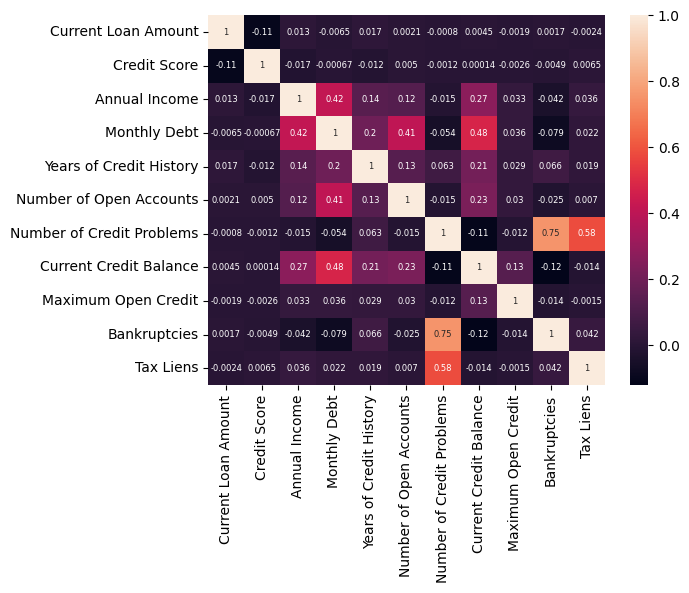

In [5]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

##### Spearman Rho

<Axes: >

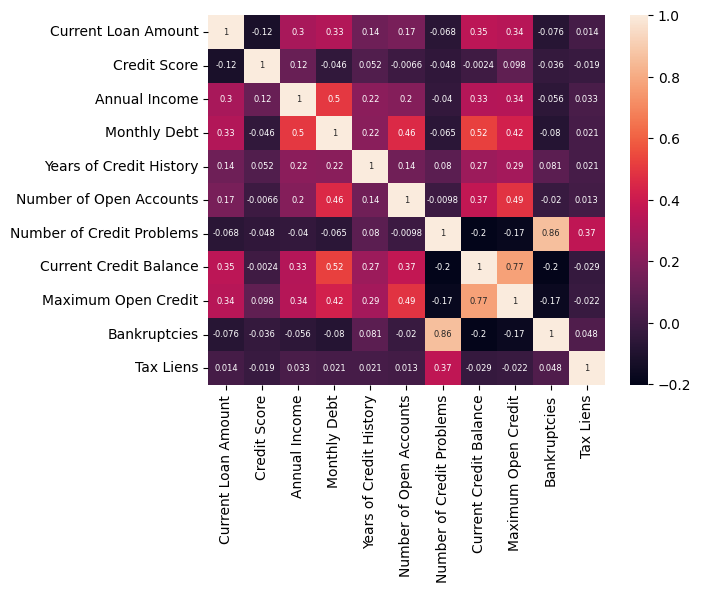

In [6]:
pearson_r = df.corr(method = "spearman")

sns.heatmap(pearson_r, annot= True, annot_kws={"fontsize":6})

### Nomor 1

##### Pertanyaan 1
Fitur apakah yang berkaitan paling tinggi dengan tingkat skor credit dari antara jumlah peminjaman, pendapatan tahunan, hutang bulanan, dan jumlah saldo kredit saat ini?
- Current Loan Amount (Jumlah peminjaman) = -0.11 or -0.12
- Annual Income (Pendapatan tahunan) = -0.017 or 0.12
- Monthly Debt (Hutang bulanan) = -0.00067 or -0.046
- Current Credit Balance (Jumlah saldo kredit saat ini) = 0.00014 or -0.0024

##### Pertanyaan 2
Apakah tujuan peminjaman dengan persentase terbanyak berdasarkan masing-masing lama
waktu peminjam telah bekerja?

In [7]:
df_home_ownership = df.groupby([df["Years in current job"], df["Purpose"].str.lower()])

counts = df_home_ownership.size().reset_index(name='count')

result = counts.groupby('Years in current job').apply(lambda x: x.loc[x['count'].idxmax()])

result["percentage"] = result['count'] / counts.groupby('Years in current job')['count'].sum() * 100

# Percentage = perbandingan value terbesar dengan SEMUA jumlah pada tahun tersebut.

result

,Years in current job,Purpose,count,percentage
Years in current job,,,,
1 year,1 year,debt consolidation,4319,77.665887
10+ years,10+ years,debt consolidation,24082,80.407346
2 years,2 years,debt consolidation,6039,77.492622
3 years,3 years,debt consolidation,5394,77.112223
4 years,4 years,debt consolidation,3956,75.655001
5 years,5 years,debt consolidation,4540,78.033689
6 years,6 years,debt consolidation,3832,78.605128
7 years,7 years,debt consolidation,3830,80.818738
8 years,8 years,debt consolidation,3142,80.030565


##### Pertanyaan 3
Berapa rata-rata hutang bulanan dari peminjaman dengan berbagai macam jenis kepemilikan rumah?

- HaveMortgage: dari 176 data, mempunyai rata-rata hutang bulanan sebesar 17861.678693
- Home Mortgage: dari 41421 (majoritas), mempunyai rata-rata hutang bulanan sebesar 20978.819016
- Own Home: dari 7773 data, mempunyai rata-rata hutang bulanan sebesar 16999.900579.
- Rent: dari 35926 data, mempunyai rata-rata hutang bulanan sebesar 15746.046472


In [8]:
df_home_ownership = df.groupby("Home Ownership")
df_home_ownership.describe()["Monthly Debt"]

,count,mean,std,min,25%,50%,75%,max
Home Ownership,,,,,,,,
HaveMortgage,176.0,17861.678693,11650.771545,373.73,8916.3675,15424.58,25825.4175,54230.56
Home Mortgage,41421.0,20978.819016,13228.352979,0.00,12044.1000,18649.26,26986.8400,435843.28
Own Home,7773.0,16999.900579,11856.042580,0.00,8906.0600,14783.33,22142.6000,139480.90
Rent,35926.0,15746.046472,10141.575381,0.00,8756.9100,13970.89,20530.2600,229057.92


##### Pertanyaan 4

Bagaimana distribusi pendapatan peminjam berdasarkan kepemillikan rumah dan jumlah akun yang akan dibuka?

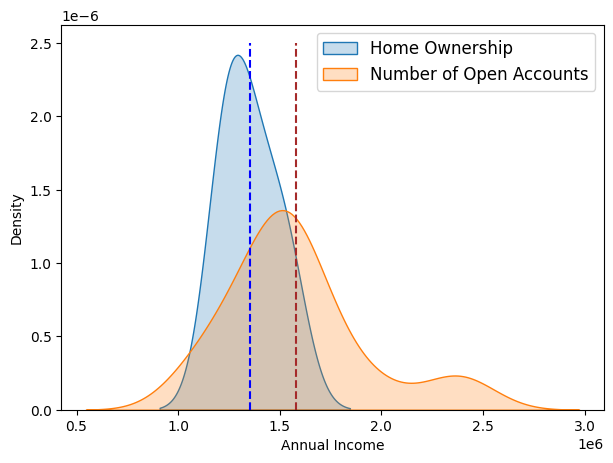

In [9]:
annual_income_home_ownership = df.groupby(df["Home Ownership"])["Annual Income"].mean()
annual_income_open_accounts = df.groupby(df["Number of Open Accounts"])["Annual Income"].mean()

plt.figure(figsize=(7,5))
sns.kdeplot(annual_income_home_ownership, shade=True)
sns.kdeplot(annual_income_open_accounts, shade=True)
plt.legend(['Home Ownership','Number of Open Accounts'], fontsize=12)
plt.vlines(annual_income_home_ownership.mean(), ymin = 0, ymax = 2.5*1e-6, color='blue', linestyle='--')
plt.vlines(annual_income_open_accounts.mean(), ymin = 0, ymax = 2.5*1e-6, color='brown', linestyle='--')

1351125.4965230857


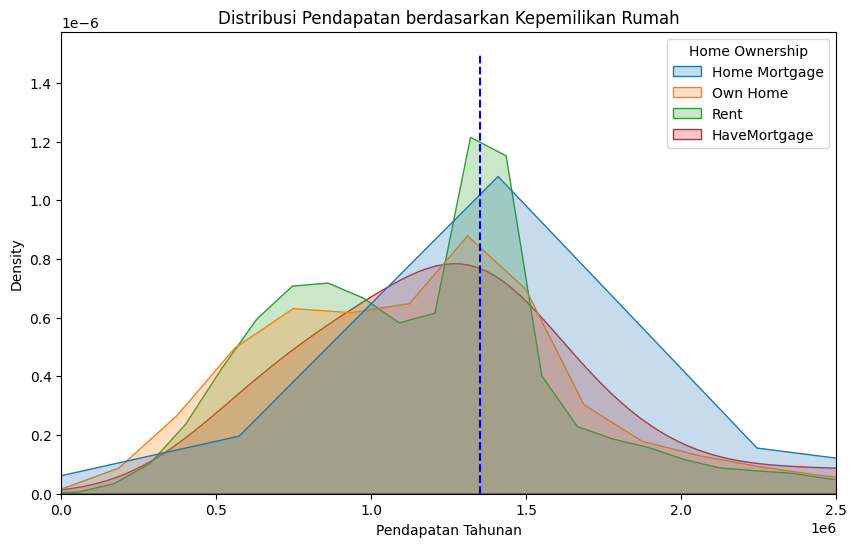

In [10]:
# Membuat KDE plot untuk distribusi pendapatan berdasarkan kepemilikan rumah
print(annual_income_home_ownership.mean())
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Annual Income", hue="Home Ownership", fill=True, common_norm=False)
plt.xlim(0, 2.5*1e6)
plt.vlines(annual_income_home_ownership.mean(), ymin = 0, ymax = 1.5*1e-6, color='blue', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Kepemilikan Rumah")
plt.xlabel("Pendapatan Tahunan")
plt.ylabel("Density")
plt.show()

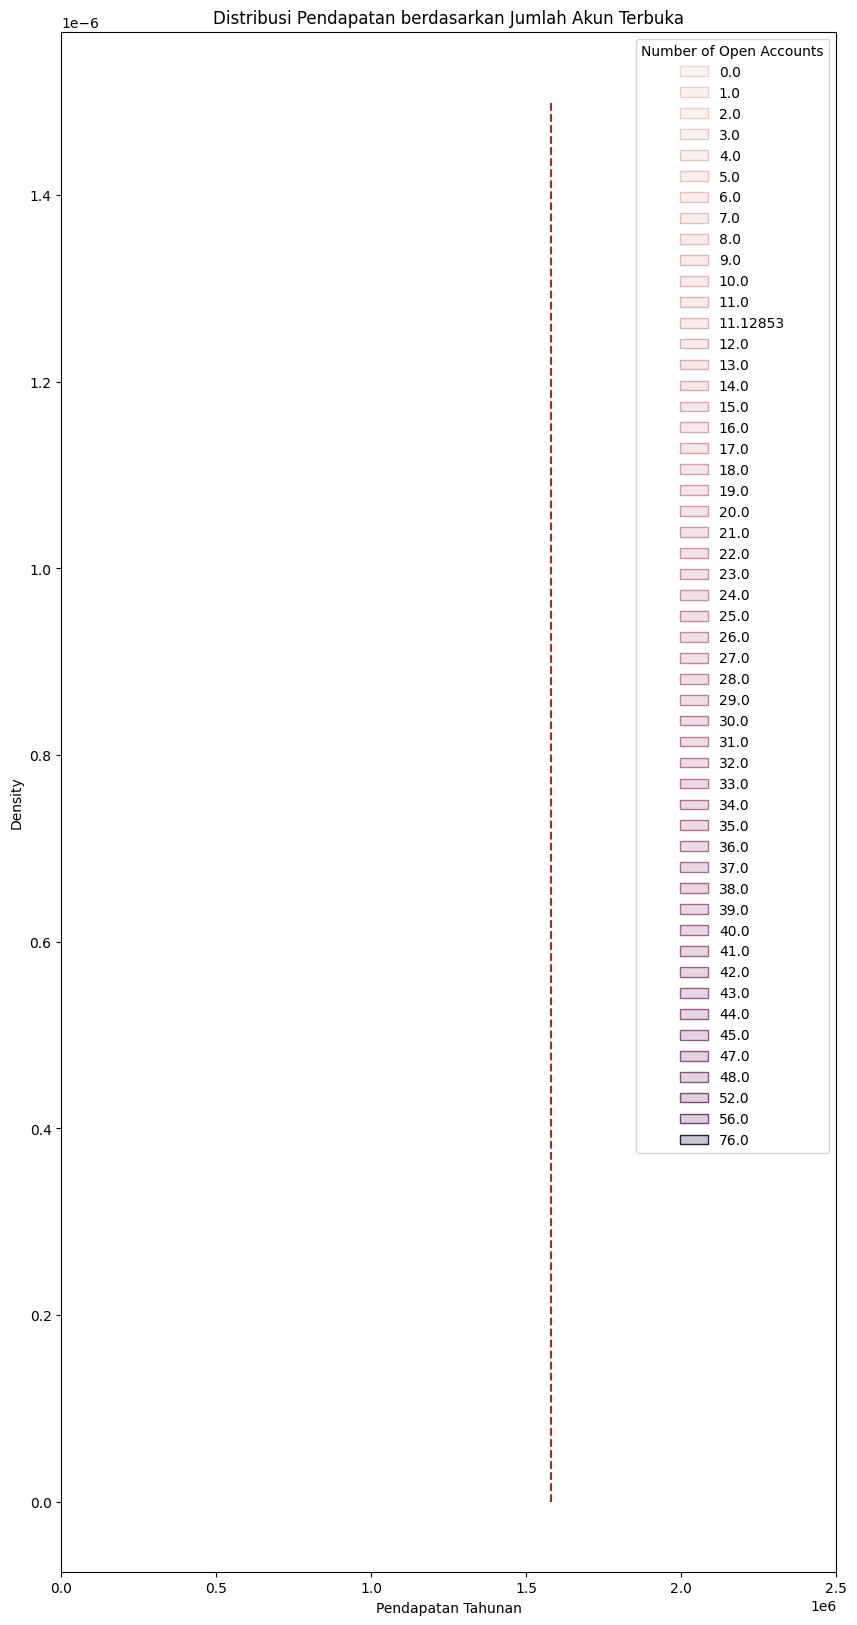

In [11]:
# Membuat KDE plot untuk distribusi pendapatan berdasarkan jumlah akun terbuka
plt.figure(figsize=(10, 20))
sns.kdeplot(data=df, x="Number of Open Accounts", hue="Number of Open Accounts", fill=True, common_norm=False)
plt.xlim(0, 2.5*1e6)
plt.vlines(annual_income_open_accounts.mean(), ymin = 0, ymax = 1.5*1e-6, color='brown', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Jumlah Akun Terbuka")
plt.xlabel("Pendapatan Tahunan")
plt.ylabel("Density")
plt.show()

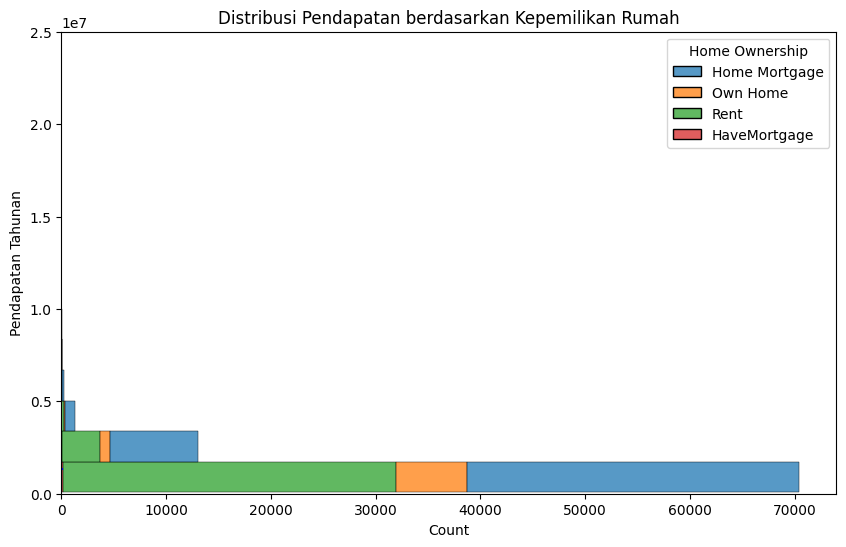

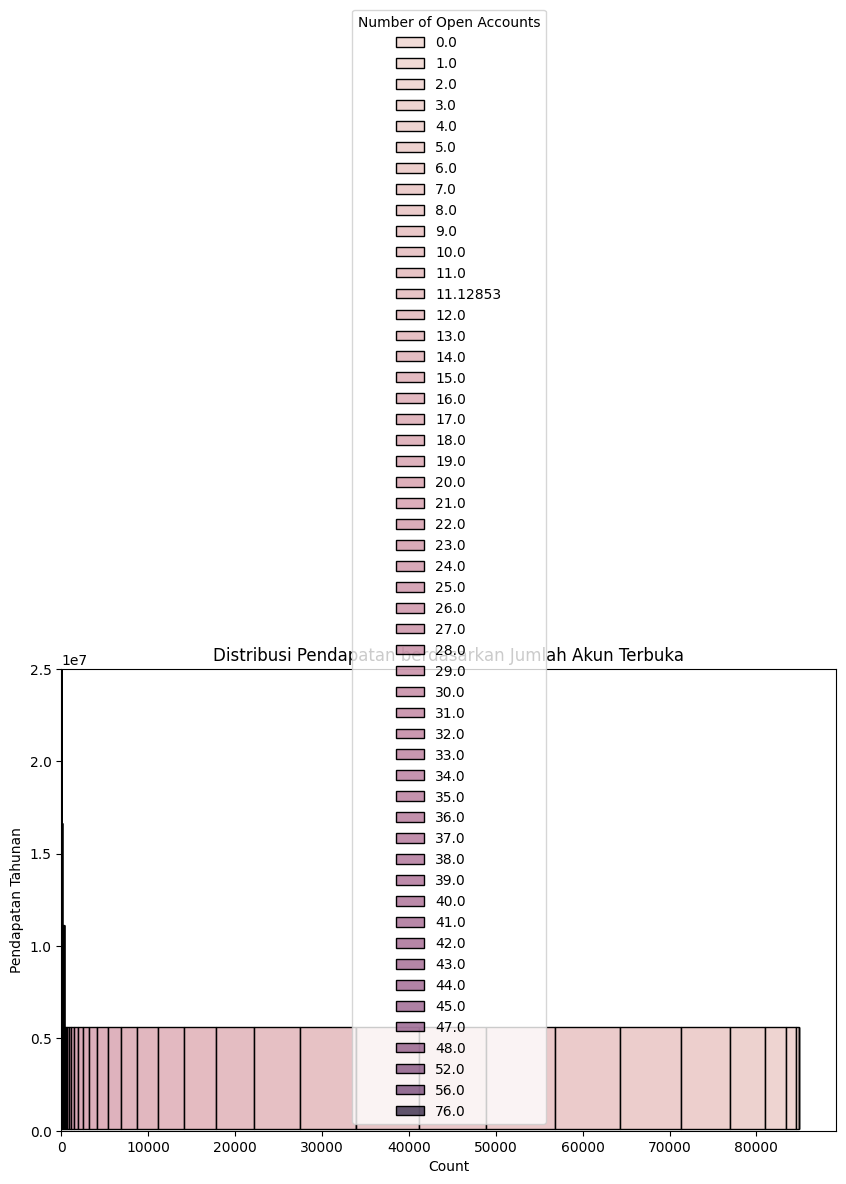

In [13]:
# Membuat histogram untuk distribusi pendapatan berdasarkan kepemilikan rumah
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y="Annual Income", hue="Home Ownership", multiple="stack", bins=100)
plt.ylim(0, 2.5*1e7)
plt.hlines(annual_income_home_ownership.mean(), xmin=0, xmax=120, color='blue', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Kepemilikan Rumah")
plt.ylabel("Pendapatan Tahunan")
plt.xlabel("Count")
plt.show()

# Membuat histogram untuk distribusi pendapatan berdasarkan jumlah akun terbuka
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y="Annual Income", hue="Number of Open Accounts", multiple="stack", bins=30)
plt.ylim(0, 2.5*1e7)
plt.hlines(annual_income_open_accounts.mean(), xmin=0, xmax=120, color='brown', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Jumlah Akun Terbuka")
plt.ylabel("Pendapatan Tahunan")
plt.xlabel("Count")
plt.show()

In [1]:
print(range)

<class 'range'>
